In [47]:
from __future__ import print_function
import ROOT
import numpy
import array

In [92]:
myfile = ROOT.TFile("higgsCombineCR123_2016_nbins3.MultiDimFit.mH120.1173796946.root",'read')
mytree=myfile.limit


mytree.Draw("r>>hist1")
hist1 = ROOT.gDirectory.Get('hist1')
print (hist1.GetMean(), hist1.GetRMS())

mytree.Draw("WGammaBkgPhotonSF>>hist2")
hist2 = ROOT.gDirectory.Get('hist2')
print (hist2.GetMean(), hist2.GetRMS())

mytree.Draw("ZGammaBkgPhotonSF>>hist3")
hist3 = ROOT.gDirectory.Get('hist3')
print (hist3.GetMean(), hist3.GetRMS())

2.00282497251 0.0903944365686
1.00355876386 0.0760422444439
0.997969096839 0.087608956671


In [59]:
myfile = ROOT.TFile("fitDiagnosticsCR123_2016_nbins3_test.root","read")

fit_s = myfile.Get("fit_s")
print (fit_s.floatParsFinal().find("r").getVal())
print (fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getVal())
print (fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getVal())

1.90902782416
1.00137500397
0.848997390635


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file misID_closure_2016_3.pdf has been created


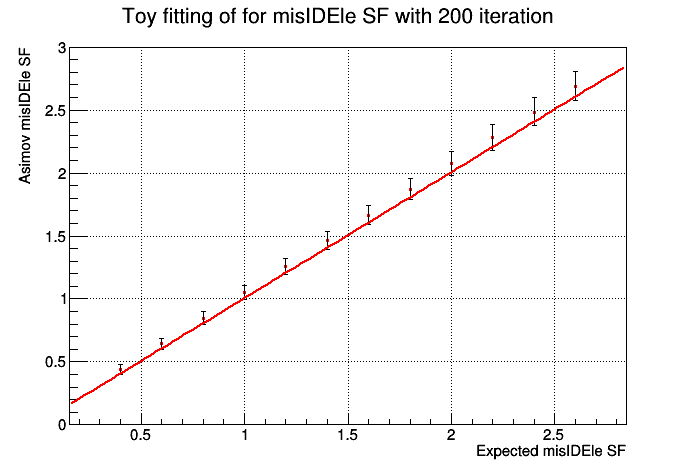

In [58]:
ListOfFiles = [
               "fitDiagnosticsdatacard_CR123_2016_nbins3_0.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_0.6.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_0.8.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_1.0.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_1.2.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_1.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_1.6.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_1.8.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_2.0.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_2.2.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_2.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins3_2.6.root",
              ]
c1 = ROOT.TCanvas( 'c1', 'Asimov vs expected signal strength', 200, 10, 700, 500 )
c1.SetGrid()

xData = list(numpy.arange(0.4,2.8,0.2))
yData = []
n = len(xData)
errMinusData = []
errPlusData = []
zerosData = []
for ifile in ListOfFiles:
    zerosData.append(0)
#     print (ifile[14:-5])
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print (ifile[14:-5], "fit_s could not find. ")
        continue
    fit_s = myfile.Get("fit_s")
    yData.append(fit_s.floatParsFinal().find("r").getVal())
    errMinusData.append(abs(fit_s.floatParsFinal().find("r").getErrorLo()))
    errPlusData.append(fit_s.floatParsFinal().find("r").getErrorHi())

#     yData.append(fit_s.floatParsFinal().find("nonPromptSF").getVal())
#     errMinusData.append(abs(fit_s.floatParsFinal().find("nonPromptSF").getErrorLo()))
#     errPlusData.append(fit_s.floatParsFinal().find("nonPromptSF").getErrorHi())

x = array.array( 'f', xData )
y = array.array( 'f', yData )
errMinus = array.array( 'f', errMinusData )
errPlus  = array.array( 'f', errPlusData )
zeros = array.array('f',zerosData)

oneLine = ROOT.TF1("oneline","x",0,3)

gr = ROOT.TGraphAsymmErrors( n, x, y, zeros,zeros,errMinus, errPlus)
gr.SetTitle('Toy fitting of for misIDEle SF with 200 iteration')
gr.GetXaxis().SetTitle("Expected misIDEle SF");
gr.GetYaxis().SetTitle("Asimov misIDEle SF");
gr.SetMarkerColor(2)
gr.SetMarkerStyle(7)
gr.GetXaxis().SetRangeUser(0,3)
gr.GetYaxis().SetRangeUser(0,3)
# gr.SetMarkerSize(3)
gr.Draw('AP')
oneLine.Draw('same')
c1.Draw()
c1.Print("misID_closure_2016_3.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file misID_closure_2016_6.pdf has been created


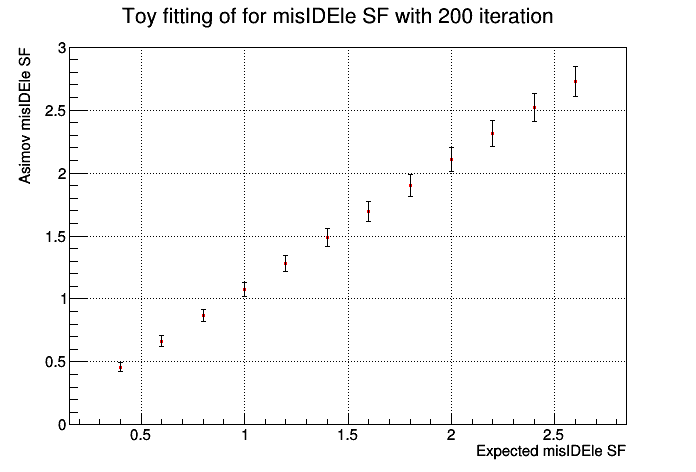

In [49]:
ListOfFiles = [
               "fitDiagnosticsdatacard_CR123_2016_nbins6_0.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_0.6.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_0.8.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_1.0.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_1.2.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_1.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_1.6.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_1.8.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_2.0.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_2.2.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_2.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins6_2.6.root",
              ]
c1 = ROOT.TCanvas( 'c1', 'Asimov vs expected signal strength', 200, 10, 700, 500 )
c1.SetGrid()

xData = list(numpy.arange(0.4,2.8,0.2))
yData = []
n = len(xData)
errMinusData = []
errPlusData = []
zerosData = []
for ifile in ListOfFiles:
    zerosData.append(0) 
#     print (ifile[14:-5])
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print (ifile[14:-5], "fit_s could not find. ")
        continue
    fit_s = myfile.Get("fit_s")
    yData.append(fit_s.floatParsFinal().find("r").getVal())
    errMinusData.append(abs(fit_s.floatParsFinal().find("r").getErrorLo()))
    errPlusData.append(fit_s.floatParsFinal().find("r").getErrorHi())

#     yData.append(fit_s.floatParsFinal().find("nonPromptSF").getVal())
#     errMinusData.append(abs(fit_s.floatParsFinal().find("nonPromptSF").getErrorLo()))
#     errPlusData.append(fit_s.floatParsFinal().find("nonPromptSF").getErrorHi())

x = array.array( 'f', xData )
y = array.array( 'f', yData )
errMinus = array.array( 'f', errMinusData )
errPlus  = array.array( 'f', errPlusData )


zeros = array.array('f',zerosData)


gr = ROOT.TGraphAsymmErrors( n, x, y, zeros,zeros,errMinus, errPlus)
gr.SetTitle('Toy fitting of for misIDEle SF with 200 iteration')
gr.GetXaxis().SetTitle("Expected misIDEle SF");
gr.GetYaxis().SetTitle("Asimov misIDEle SF");
gr.SetMarkerColor(2)
gr.SetMarkerStyle(7)
gr.GetXaxis().SetRangeUser(0,3)
gr.GetYaxis().SetRangeUser(0,3)
# gr.SetMarkerSize(3)
gr.Draw('AP')

c1.Draw()
c1.Print("misID_closure_2016_6.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file misID_closure_2016_9.pdf has been created


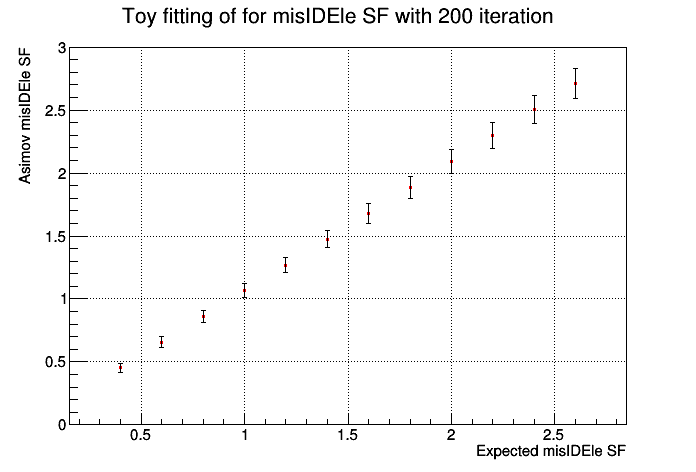

In [50]:
ListOfFiles = [
               "fitDiagnosticsdatacard_CR123_2016_nbins9_0.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_0.6.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_0.8.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_1.0.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_1.2.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_1.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_1.6.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_1.8.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_2.0.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_2.2.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_2.4.root",
               "fitDiagnosticsdatacard_CR123_2016_nbins9_2.6.root",
              ]
c1 = ROOT.TCanvas( 'c1', 'Asimov vs expected signal strength', 200, 10, 700, 500 )
c1.SetGrid()

xData = list(numpy.arange(0.4,2.8,0.2))
yData = []
n = len(xData)
errMinusData = []
errPlusData = []
zerosData = []
for ifile in ListOfFiles:
    zerosData.append(0)
#     print (ifile[14:-5])
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print (ifile[14:-5], "fit_s could not find. ")
        continue
    fit_s = myfile.Get("fit_s")
    yData.append(fit_s.floatParsFinal().find("r").getVal())
    errMinusData.append(abs(fit_s.floatParsFinal().find("r").getErrorLo()))
    errPlusData.append(fit_s.floatParsFinal().find("r").getErrorHi())

#     yData.append(fit_s.floatParsFinal().find("nonPromptSF").getVal())
#     errMinusData.append(abs(fit_s.floatParsFinal().find("nonPromptSF").getErrorLo()))
#     errPlusData.append(fit_s.floatParsFinal().find("nonPromptSF").getErrorHi())

x = array.array( 'f', xData )
y = array.array( 'f', yData )
errMinus = array.array( 'f', errMinusData )
errPlus  = array.array( 'f', errPlusData )
zeros = array.array('f',zerosData)


gr = ROOT.TGraphAsymmErrors( n, x, y,zeros,zeros,errMinus, errPlus)
gr.SetTitle('Toy fitting of for misIDEle SF with 200 iteration')
gr.GetXaxis().SetTitle("Expected misIDEle SF");
gr.GetYaxis().SetTitle("Asimov misIDEle SF");
gr.SetMarkerColor(2)
gr.SetMarkerStyle(7)
gr.GetXaxis().SetRangeUser(0,3)
gr.GetYaxis().SetRangeUser(0,3)
# gr.SetMarkerSize(3)
gr.Draw('AP')

c1.Draw()
c1.Print("misID_closure_2016_9.pdf")